# Numerical Exercise 04

In [43]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
from scipy.optimize import curve_fit
import statsmodels.api as sm
import math

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
names = ["solid", "liquid", "gas"]



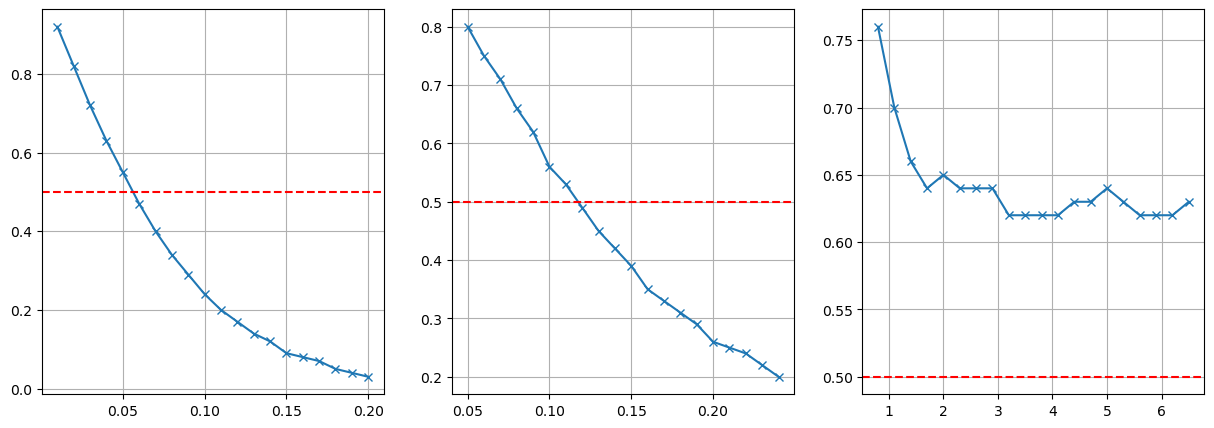

In [44]:
fig = plt.figure(figsize=(15,5))
for i in range(3):
    temp, delta, acceptance = np.loadtxt("../data/ex07_acceptance_{phase}.dat".format(phase=names[i]), unpack=True, usecols=(0,1,2), skiprows=1)
    fig.add_subplot(1,3,i+1)
    plt.plot(delta, acceptance, marker="x")
    plt.grid(True)
    plt.axhline(y=0.5, color='r', linestyle='--')
plt.show()

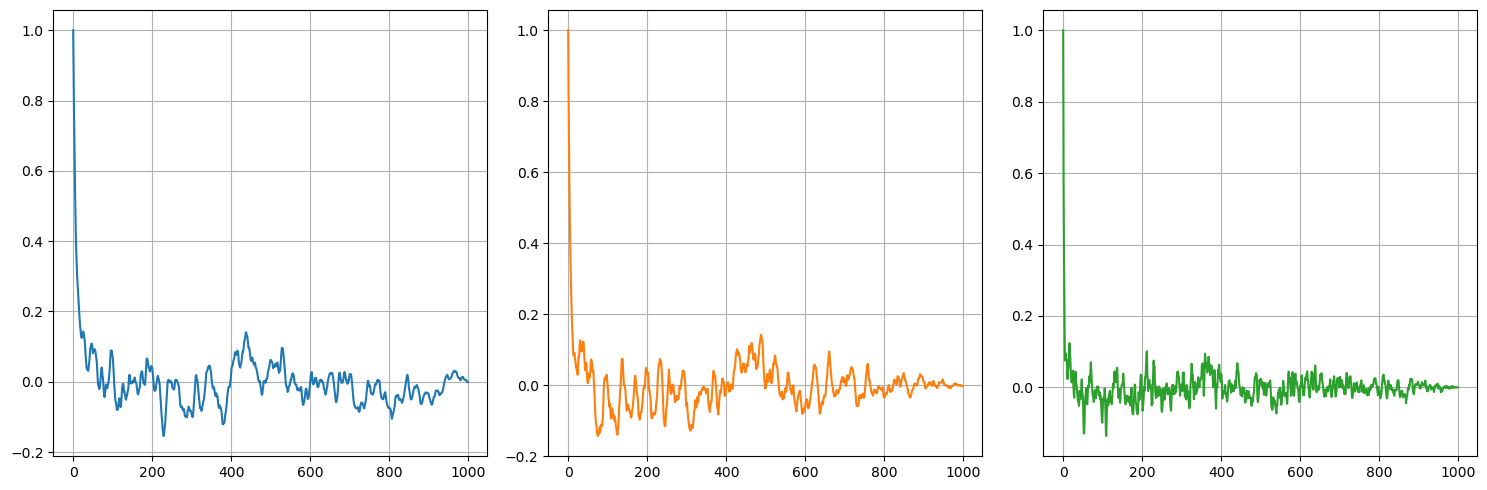

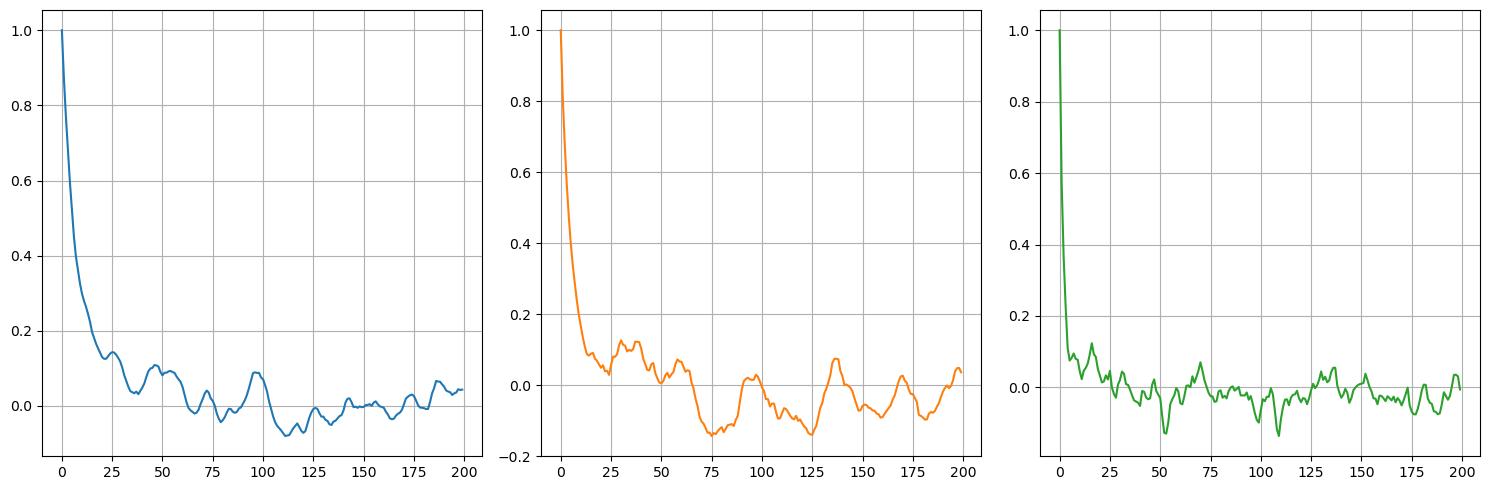

ValueError: Attenzione: il numero di blocchi inserito non è divisore del numero di lanci totale.

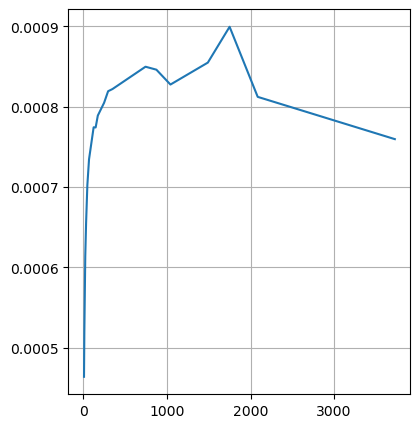

In [45]:
def calculate_autocorrelation(series):
    n = len(series)
    mean = np.mean(series)
    centered_series = series - mean
    autocorrelation = np.correlate(centered_series, centered_series, mode='full')[-n:]
    autocorrelation /= autocorrelation[0]
    return autocorrelation

solid = np.loadtxt("../data/ex07_istant_solid.dat", unpack=True, usecols=(0))
liquid = np.loadtxt("../data/ex07_istant_liquid.dat", unpack=True, usecols=(0))
gas = np.loadtxt("../data/ex07_istant_gas.dat", unpack=True, usecols=(0))

fig = plt.figure(figsize=(15,5))
autocorr = []
for i, series in enumerate([solid, liquid, gas]):
    fig.add_subplot(1,3,i+1)
    autocorr.append(calculate_autocorrelation(series[:1000]))
    plt.plot(autocorr[i], color=colors[i])
    plt.grid(True)
plt.tight_layout()
plt.show()

fig = plt.figure(figsize=(15,5))
for i in range(3):
    fig.add_subplot(1,3,i+1)
    plt.plot(autocorr[i][:200], color=colors[i])
    plt.grid(True)
plt.tight_layout()
plt.show()

